In [164]:
import numpy as np
import pandas as pd
import seaborn as sns

In [161]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Train.csv")

In [162]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [163]:
print(X.shape,y.shape)

(1600, 5) (1600,)


<AxesSubplot:>

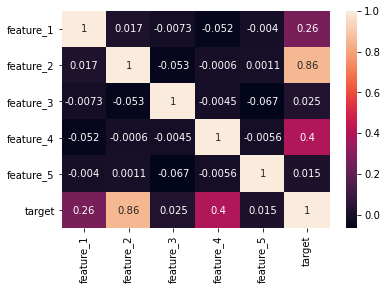

In [170]:
sns.heatmap(df.corr(),annot=True)

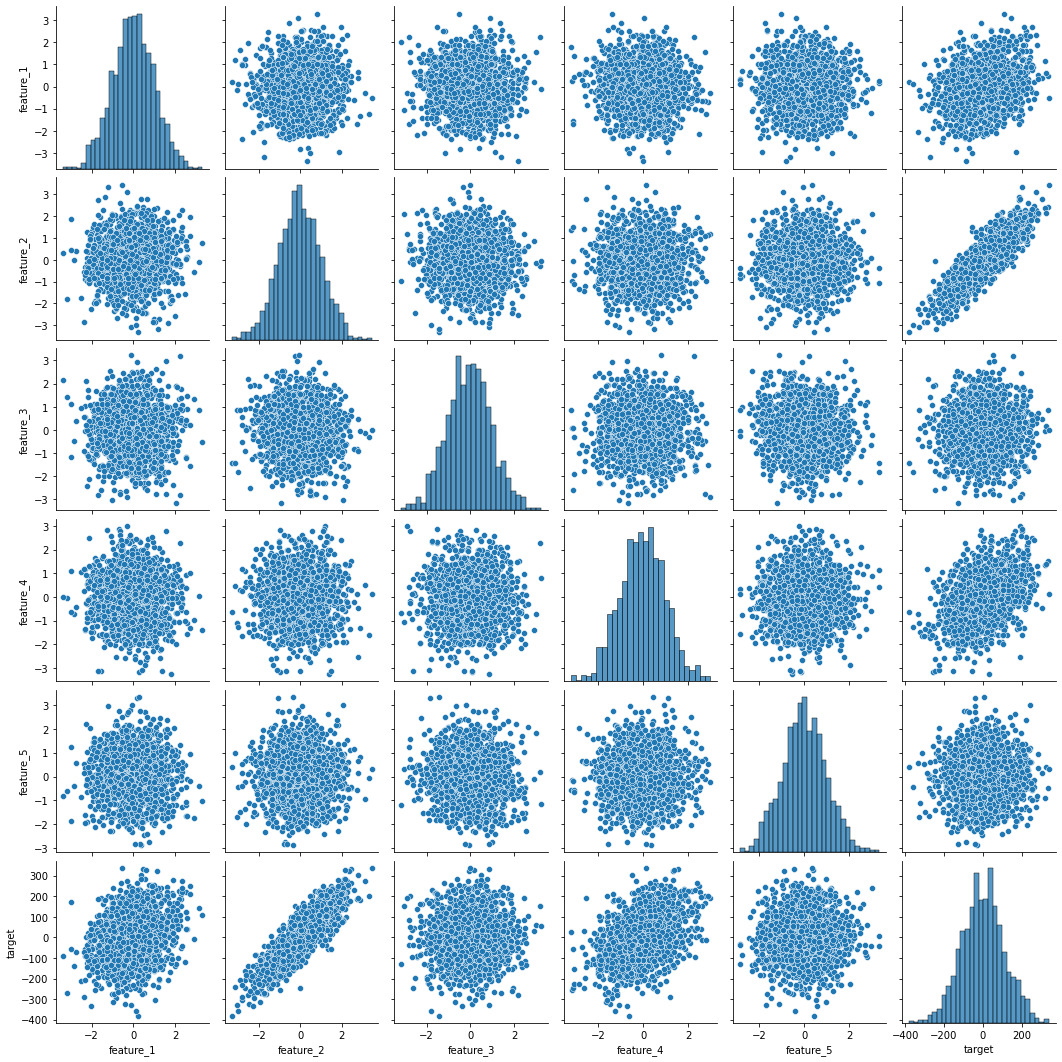

In [169]:
sns.pairplot(df)

In [5]:
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

In [62]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape,y.shape)

(1600, 6) (1600,)


In [63]:
y=y.values
X

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
         0.52566183],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124,
         0.59799685],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396,
        -0.18736416],
       ...,
       [ 1.        ,  1.04417694, -0.89920649,  1.73039905, -1.87105676,
         0.44251965],
       [ 1.        , -1.2691729 , -0.00505216,  1.85766873, -1.08036482,
         0.73633394],
       [ 1.        , -1.88400025, -0.84942743, -1.45227035,  0.48861308,
         1.4595758 ]])

In [129]:
def hyp(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e=0.0
    y_=hyp(X,theta)
    e=np.sum((y-y_)**2)
    
    return e/X.shape[0]

def gradient(X,y,theta):
    y_=hyp(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    
    return grad/m

def mini_batch_gradient_desent(X,y,batch_size=100,learning_rate=0.01,max_steps=100):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    theta_list=[]
    
    data=np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_steps):
        
        #mini batch gradient desent
        
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for j in range(total_batches):
            batch_data=data[j*batch_size:(j+1)*batch_size,:]
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            batch_gradient=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_gradient
            e=error(x_batch,y_batch,theta)
            error_list.append(e)
        theta_list.append(theta)    
        
    return theta,error_list,theta_list

In [130]:
theta,error_list,theta_list=mini_batch_gradient_desent(X,y)

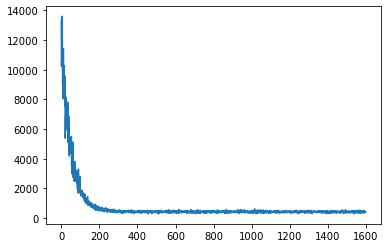

In [131]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

In [133]:
error(X,y,theta)

415.55357719406123

In [135]:
test=pd.read_csv(r"C:\Users\hp\Desktop\Test.csv")
test

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [136]:
ones=np.ones((test.shape[0],1))
test=np.hstack((ones,test))
print(test.shape)

(400, 6)


In [137]:
test

array([[ 1.00000000e+00,  1.01525387e+00,  2.07620944e+00,
        -2.66434820e-01, -2.41808820e+00, -9.80502790e-01],
       [ 1.00000000e+00, -3.75021204e-01,  9.53184528e-01,
         6.26719138e-01,  7.04405750e-01, -3.55489211e-01],
       [ 1.00000000e+00, -1.02445225e+00,  9.62991107e-01,
        -4.07942004e-01, -1.86127383e+00,  4.55201351e-01],
       ...,
       [ 1.00000000e+00,  5.54727647e-01,  1.76824345e+00,
        -8.97787210e-01, -1.19366107e+00,  3.40563374e-01],
       [ 1.00000000e+00, -1.62717246e+00,  8.56470994e-01,
        -5.65729519e-04,  6.29386649e-01,  4.53382144e-01],
       [ 1.00000000e+00,  1.39310499e-01,  5.31597186e-01,
        -8.53107053e-01,  3.16920076e-02,  1.71489304e+00]])

In [151]:
def hyp(X,theta):
    return np.dot(X,theta)
result=hyp(test,theta)

In [153]:
result


array([ 1.14614071e+02,  1.18000917e+02, -2.17470245e+01, -4.39622970e+01,
       -9.59302275e+01, -4.45189021e+01, -7.55837353e+01,  2.38116934e+01,
        1.73815875e+02,  1.72865961e+02, -1.05416788e+02, -2.08088790e+01,
       -3.91112306e+00,  1.22996126e+02,  4.03193078e+01,  4.57020246e+01,
       -1.89612485e+02,  2.26342982e+01,  1.16194384e+01,  1.36351516e+02,
        6.49144489e+01, -6.19904057e+01, -1.08215389e+02, -7.42655205e+00,
       -5.85323280e+01,  1.19015448e+01,  2.92545204e+01,  1.07703940e+02,
        2.41382201e+01, -2.61022666e+01,  1.10958639e+02, -4.48814051e+01,
        2.16808429e+02, -1.38504766e+01, -2.28614731e+02,  1.54896852e+02,
       -2.21273433e+00,  1.27260098e+01, -3.08324218e+02,  7.71040232e+01,
       -8.12124812e+01, -2.06650244e+02, -2.38767267e+02,  1.34735703e+02,
       -7.37704445e+01,  1.05477955e+02, -3.59882581e+00,  2.06329157e+01,
       -9.80205909e+01, -2.75275502e+01,  1.08135525e+01, -1.74458632e+02,
        6.51654957e+01, -

In [158]:
result=pd.DataFrame(result,columns=['target'])

In [160]:
result.to_csv("submit.csv")